In [1]:
import acquire
import prepare

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json

In [3]:
df = pd.read_json('data.json')

In [4]:
import unicodedata
import re
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.corpus import stopwords

In [5]:
extra_words = ['see', 'source', 'example', 'code', 'use', '1', "'", ';', '&#9']

In [6]:
prepared_data = prepare.prepare_df(df, 'readme_contents', extra_words = extra_words)

In [7]:
prepared_data.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,original_length,stem_length,lem_length,original_word_count,stemmed_word_count,lemmatized_word_count
0,janishar/mit-deep-learning-book-pdf,Java,[![Download](https://img.shields.io/badge/down...,downloadhttpsimgshieldsiobadgedownloadbookmark...,downloadhttpsimgshieldsiobadgedownloadbookmark...,downloadhttpsimgshieldsiobadgedownloadbookmark...,2995,1971,2112,369,212,214
1,Angel-ML/angel,Java,![](assets/angel_logo.png)\n\n[![license](http...,assetsangellogopng licensehttpimgshieldsiobadg...,assetsangellogopng licensehttpimgshieldsiobadg...,assetsangellogopng licensehttpimgshieldsiobadg...,7394,5235,5508,511,349,350
2,Alluxio/alluxio,Java,"[![logo](docs/resources/alluxio_logo.png ""Allu...",logodocsresourcesalluxiologopng alluxiohttpsww...,logodocsresourcesalluxiologopng alluxiohttpsww...,logodocsresourcesalluxiologopng alluxiohttpsww...,7952,5564,5952,751,476,481
3,haifengl/smile,Java,# Smile\n\n[![Join the chat at https://gitter....,smile join chat httpsgitterimhaifenglsmilehttp...,smile join chat httpsgitterimhaifenglsmilehttp...,smile join chat httpsgitterimhaifenglsmilehttp...,11823,7359,8115,1053,755,755
4,alibaba/Alink,Java,<font size=7>English| [简体中文](README.md)</font>...,font size7english readmemdfont alink alink mac...,font size7english readmemdfont alink alink mac...,font size7english readmemdfont alink alink mac...,10975,7188,7740,967,636,640


In [8]:
train, validate, test = prepare.train_validate_test_split(prepared_data, 'language')

In [9]:
java_words = (' '.join(train.lemmatized[train.language == 'Java'])).split()
python_words = (' '.join(train.lemmatized[train.language == 'Python'])).split()
c_words = (' '.join(train.lemmatized[train.language == 'C++'])).split()
all_words = (' '.join(train.lemmatized)).split()

java_freq = pd.Series(java_words).value_counts()
python_freq = pd.Series(python_words).value_counts()
c_freq = pd.Series(c_words).value_counts()
all_freq = pd.Series(all_words).value_counts()

In [10]:
word_counts = (pd.concat([all_freq, java_freq, python_freq, c_freq], axis=1, sort=True)
              .set_axis(['all','java', 'python', 'c++'], axis=1, inplace=False)
              .fillna(0)
              .apply(lambda s: s.astype(int)))

In [11]:
print('java words: ' + str(len(java_words)))
print('python words: ' + str(len(python_words)))
print('c words: ' + str(len(c_words)))
print('all words: ' + str(len(all_words)))

java words: 11832
python words: 52603
c words: 12612
all words: 77047


In [12]:
word_counts.sort_values(by='all', ascending=False).head(20)

,all,java,python,c++
install,1123,21,1007,95
codea,894,0,894,0
detail,712,7,678,27
pip,705,11,661,33
open,704,17,664,23
git,670,2,645,23
clone,660,3,641,16
python,632,26,527,79
detailssummaryba,620,0,620,0
month,618,1,616,1


## Some bigrams

Text(0.5, 0, 'Frequency')

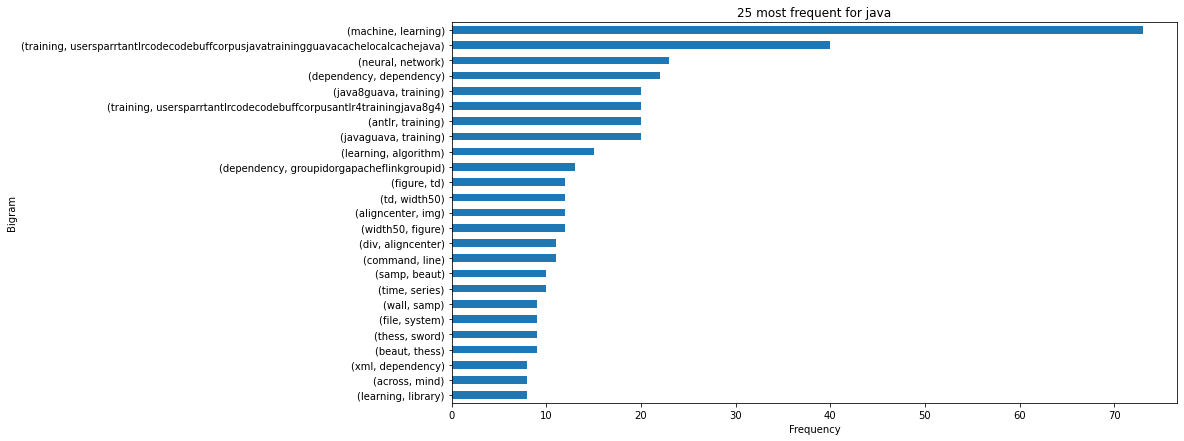

In [13]:
java_bigrams = (pd.Series(nltk.ngrams(java_words, 2))
               .value_counts()
               .head(25))
java_bigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for java')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

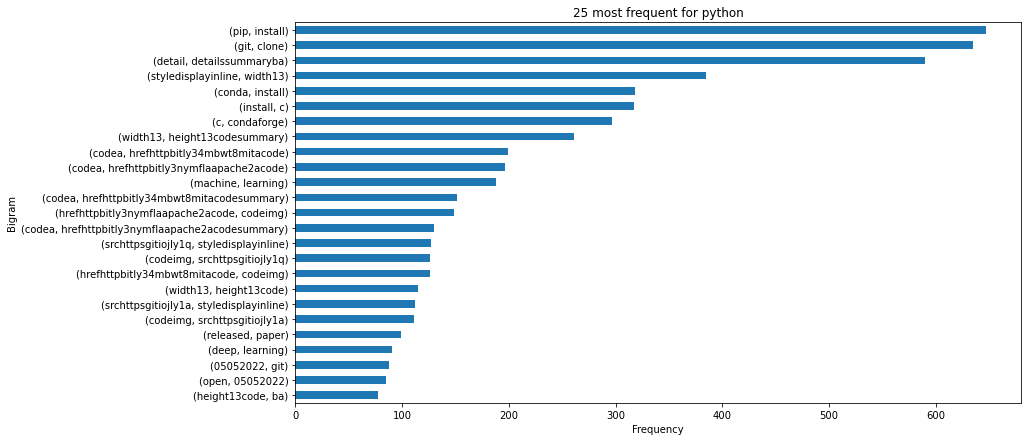

In [14]:
python_bigrams = (pd.Series(nltk.ngrams(python_words, 2))
               .value_counts()
               .head(25))
python_bigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for python')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

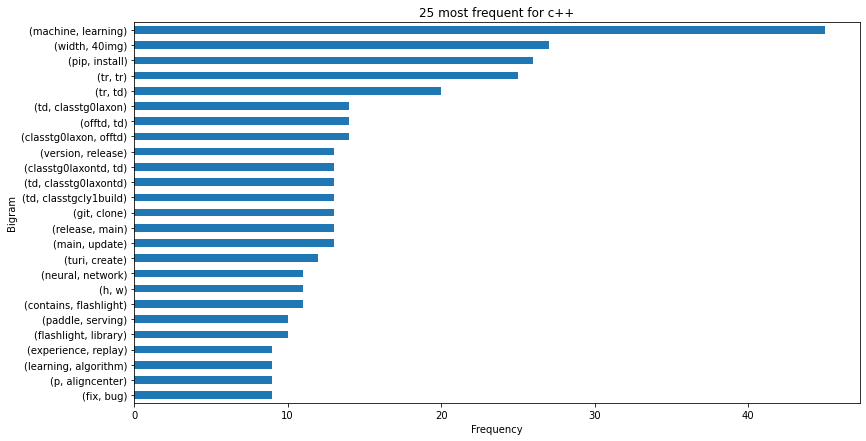

In [15]:
c_bigrams = (pd.Series(nltk.ngrams(c_words, 2))
               .value_counts()
               .head(25))
c_bigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for c++')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

## Some trigrams

Text(0.5, 0, 'Frequency')

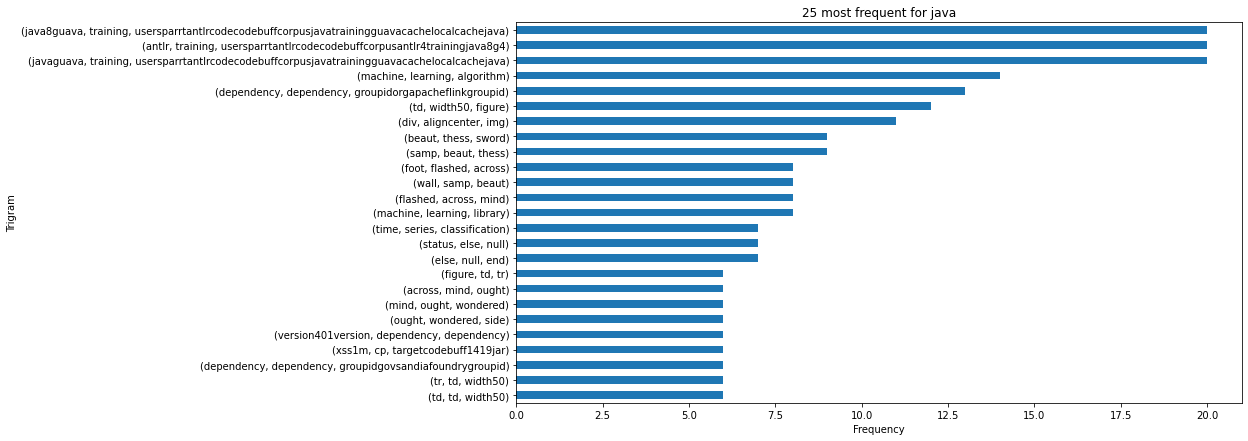

In [16]:
java_trigrams = (pd.Series(nltk.ngrams(java_words, 3))
               .value_counts()
               .head(25))
java_trigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for java')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

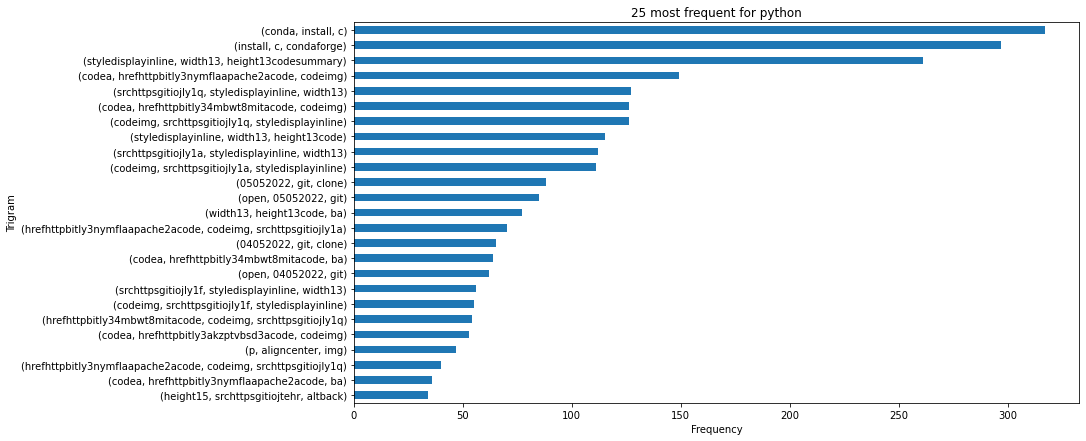

In [17]:
python_trigrams = (pd.Series(nltk.ngrams(python_words, 3))
               .value_counts()
               .head(25))
python_trigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for python')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

Text(0.5, 0, 'Frequency')

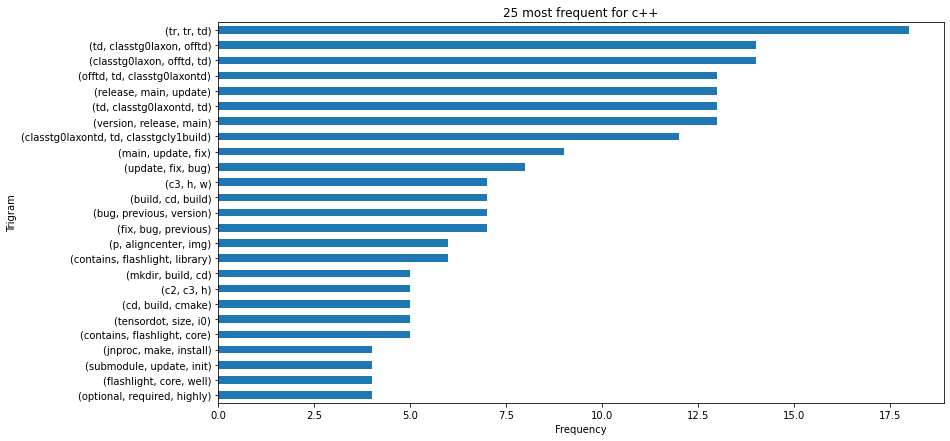

In [18]:
c_trigrams = (pd.Series(nltk.ngrams(c_words, 3))
               .value_counts()
               .head(25))
c_trigrams.sort_values().plot.barh(figsize=(13,7))
plt.title('25 most frequent for c++')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()

In [20]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,original_length,stem_length,lem_length,original_word_count,stemmed_word_count,lemmatized_word_count
29,Waikato/meka,Java,# Meka\n\nThe MEKA project provides an open so...,meka meka project provides open implementation...,meka meka project provid open implement method...,meka meka project provides open implementation...,1196,711,791,160,83,81
86,StanfordSNR/puffer,C++,# Puffer\n\nPuffer ([puffer.stanford.edu](http...,puffer puffer pufferstanfordeduhttpspufferstan...,puffer puffer pufferstanfordeduhttpspufferstan...,puffer puffer pufferstanfordeduhttpspufferstan...,512,356,386,50,30,31
133,rasbt/mlxtend,Python,[![DOI](https://joss.theoj.org/papers/10.21105...,doihttpsjosstheojorgpapers1021105joss00638stat...,doihttpsjosstheojorgpapers1021105joss00638stat...,doihttpsjosstheojorgpapers1021105joss00638stat...,5620,3773,4032,530,350,350
45,wen-fei/choice,Java,# 基于简单机器算法的考研择校智能推荐系统\n\n## 使用的技术：\n\n### We...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,414,66,66,26,5,5
68,4paradigm/OpenMLDB,C++,"\n<div align=center><img src=""./images/openmld...",div aligncenterimg srcimagesopenmldblogopng wi...,div aligncenterimg srcimagesopenmldblogopng wi...,div aligncenterimg srcimagesopenmldblogopng wi...,13382,8665,9754,1453,899,909


In [21]:
def length_row(string):
    return len(string)

In [22]:
train['lem_length'] = train.lemmatized.apply(length_row)
train['clean_length'] = train.clean.apply(length_row)

In [23]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,original_length,stem_length,lem_length,original_word_count,stemmed_word_count,lemmatized_word_count,clean_length
29,Waikato/meka,Java,# Meka\n\nThe MEKA project provides an open so...,meka meka project provides open implementation...,meka meka project provid open implement method...,meka meka project provides open implementation...,1196,711,791,160,83,81,828
86,StanfordSNR/puffer,C++,# Puffer\n\nPuffer ([puffer.stanford.edu](http...,puffer puffer pufferstanfordeduhttpspufferstan...,puffer puffer pufferstanfordeduhttpspufferstan...,puffer puffer pufferstanfordeduhttpspufferstan...,512,356,386,50,30,31,387
133,rasbt/mlxtend,Python,[![DOI](https://joss.theoj.org/papers/10.21105...,doihttpsjosstheojorgpapers1021105joss00638stat...,doihttpsjosstheojorgpapers1021105joss00638stat...,doihttpsjosstheojorgpapers1021105joss00638stat...,5620,3773,4032,530,350,350,4069
45,wen-fei/choice,Java,# 基于简单机器算法的考研择校智能推荐系统\n\n## 使用的技术：\n\n### We...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,414,66,66,26,5,5,66
68,4paradigm/OpenMLDB,C++,"\n<div align=center><img src=""./images/openmld...",div aligncenterimg srcimagesopenmldblogopng wi...,div aligncenterimg srcimagesopenmldblogopng wi...,div aligncenterimg srcimagesopenmldblogopng wi...,13382,8665,9754,1453,899,909,9876


In [24]:
alpha = .05

In [25]:
length_j = train[train.language == 'Java'].lem_length
length_p = train[train.language == 'Python'].lem_length
length_c = train[train.language == 'C++'].lem_length

In [26]:
train[train.language == 'Java'].var()

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_48300/3830636543.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train[train.language == 'Java'].var()


original_length          2.548339e+07
stem_length              1.026523e+07
lem_length               1.209243e+07
original_word_count      3.421067e+05
stemmed_word_count       1.168455e+05
lemmatized_word_count    1.176252e+05
clean_length             1.237005e+07
dtype: float64

In [27]:
train[train.language == 'Python'].var()

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_48300/1860012601.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train[train.language == 'Python'].var()


original_length          7.867624e+09
stem_length              3.425191e+09
lem_length               3.668297e+09
original_word_count      8.429106e+07
stemmed_word_count       2.758812e+07
lemmatized_word_count    2.762548e+07
clean_length             4.246051e+09
dtype: float64

In [28]:
train[train.language == 'C++'].var()

/var/folders/pt/3m3r1rq55pdgzpmnqzkdjb240000gn/T/ipykernel_48300/3511316123.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train[train.language == 'C++'].var()


original_length          3.351164e+07
stem_length              1.466836e+07
lem_length               1.690838e+07
original_word_count      3.427455e+05
stemmed_word_count       1.382675e+05
lemmatized_word_count    1.405875e+05
clean_length             1.723749e+07
dtype: float64

In [29]:
# Variances are not equal

In [30]:
import scipy.stats as stats
f, p = stats.f_oneway(length_j, length_p, length_c)

In [31]:
f, p

(2.7255840926796004, 0.07151928871079834)

In [32]:
# For now the p value is not smaller than alpha, so will move forward ignoring the length of the readme

In [33]:
x_train = tfidf.fit_transform(train.lemmatized)
x_validate = tfidf.transform(validate.lemmatized)
x_test = tfidf.transform(test.lemmatized)

In [34]:
y_train = train.language
y_validate = validate.language
y_test = test.language

## Baseline assumption

In [35]:
# There is an equal inclusion of Java, Python, and C++ for languages. The python does have a higher word count by
# a large margin so will, for now, use Python as the baseline assumption. 

### Logistic Regression:
Seems to be a good first try given the dataset

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [37]:
x_train

<84x19518 sparse matrix of type '<class 'numpy.float64'>'
	with 33685 stored elements in Compressed Sparse Row format>

In [38]:
lm = LogisticRegression().fit(x_train, y_train)
train['predicted'] = lm.predict(x_train)
validate['predicted'] = lm.predict(x_validate)
test['predicted'] = lm.predict(x_test)

In [39]:
print('Accuracy: {:.2%}'.format(accuracy_score(train.language, train.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(train.predicted, train.language))
print('---')
print(classification_report(train.language, train.predicted))

Accuracy: 100.00%
---
Confusion Matrix
language   C++  Java  Python
predicted                   
C++         28     0       0
Java         0    28       0
Python       0     0      28
---
              precision    recall  f1-score   support

         C++       1.00      1.00      1.00        28
        Java       1.00      1.00      1.00        28
      Python       1.00      1.00      1.00        28

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [40]:
print('Accuracy: {:.2%}'.format(accuracy_score(validate.language, validate.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(validate.predicted, validate.language))
print('---')
print(classification_report(validate.language, validate.predicted))

Accuracy: 88.89%
---
Confusion Matrix
language   C++  Java  Python
predicted                   
C++         10     1       1
Java         1    11       0
Python       1     0      11
---
              precision    recall  f1-score   support

         C++       0.83      0.83      0.83        12
        Java       0.92      0.92      0.92        12
      Python       0.92      0.92      0.92        12

    accuracy                           0.89        36
   macro avg       0.89      0.89      0.89        36
weighted avg       0.89      0.89      0.89        36



In [41]:
print('Accuracy: {:.2%}'.format(accuracy_score(test.language, test.predicted)))
print('---')
print('Confusion Matrix')
print(pd.crosstab(test.predicted, test.language))
print('---')
print(classification_report(test.language, test.predicted))

Accuracy: 66.67%
---
Confusion Matrix
language   C++  Java  Python
predicted                   
C++          7     2       3
Java         1     8       2
Python       2     0       5
---
              precision    recall  f1-score   support

         C++       0.58      0.70      0.64        10
        Java       0.73      0.80      0.76        10
      Python       0.71      0.50      0.59        10

    accuracy                           0.67        30
   macro avg       0.67      0.67      0.66        30
weighted avg       0.67      0.67      0.66        30



In [42]:
train.sort_values(by='lem_length', ascending=False).head(50)

,repo,language,readme_contents,clean,stemmed,lemmatized,original_length,stem_length,lem_length,original_word_count,stemmed_word_count,lemmatized_word_count,clean_length,predicted
112,ml-tooling/best-of-ml-python,Python,"<!-- markdownlint-disable -->\n<h1 align=""cent...",markdownlintdisable h1 aligncenter bestof mach...,markdownlintdis h1 aligncent bestof machin lea...,markdownlintdisable h1 aligncenter bestof mach...,478896,315554,326688,49526,28331,28352,351472,Python
142,TarrySingh/Artificial-Intelligence-Deep-Learni...,Python,# NEW LIST 2022 - 2024: Machine-Learning / Dee...,new list 2022 2024 machinelearning deeplearnin...,new list 2022 2024 machinelearn deeplearn ai w...,new list 2022 2024 machinelearning deeplearnin...,71706,49246,51679,4566,2945,2964,51989,Python
100,huggingface/transformers,Python,<!---\nCopyright 2020 The HuggingFace Team. Al...,copyright 2020 huggingface team rights reserve...,copyright 2020 huggingfac team right reserv li...,copyright 2020 huggingface team right reserved...,56081,40134,42707,5475,3784,3792,42944,Python
103,fighting41love/funNLP,Python,"<center>\n <img style=""border-radius: 0.312...",center img styleborderradius 03125em boxshadow...,center img styleborderradiu 03125em boxshadow ...,center img styleborderradius 03125em boxshadow...,56349,30697,31402,2581,1780,1780,31734,Python
131,ujjwalkarn/DataSciencePython,Python,# Python Data Science Tutorials \n- This repo ...,python data science tutorials repo contains cu...,python data scienc tutori repo contain curat l...,python data science tutorial repo contains cur...,26921,19927,20997,1689,1019,1043,21106,Python
149,ml-tooling/opyrator,Python,<!-- markdownlint-disable MD033 MD041 -->\n<h1...,markdownlintdisable md033 md041 h1 aligncenter...,markdownlintdis md033 md041 h1 aligncent opyr ...,markdownlintdisable md033 md041 h1 aligncenter...,26571,17834,19066,2517,1580,1584,19218,Python
62,flashlight/flashlight,C++,"![Flashlight: Fast, Flexible Machine Learning ...",flashlight fast flexible machine learning clog...,flashlight fast flexibl machin learn clogosvg ...,flashlight fast flexible machine learning clog...,27003,17915,19025,2444,1621,1636,19177,C++
111,PySimpleGUI/PySimpleGUI,Python,"\n<p align=""center"">\n <img src=""https://raw....",p aligncenter img srchttpsrawgithubusercontent...,p aligncent img srchttpsrawgithubusercontentco...,p aligncenter img srchttpsrawgithubusercontent...,34787,15400,15745,1601,953,956,15792,Python
20,antlr/codebuff,Java,# CodeBuff smart formatter\n\nBy Terence Parr ...,codebuff smart formatter terence parr primary ...,codebuff smart formatt terenc parr primari dev...,codebuff smart formatter terence parr primary ...,21920,13905,15010,2154,1312,1314,15123,Java
139,arielf/weight-loss,Python,Discovering ketosis: _how to effectively lose ...,discovering ketosis effectively lose weight ch...,discov ketosi effect lose weight chart weight ...,discovering ketosis effectively lose weight ch...,21885,13053,14212,3263,1805,1810,14433,Python


In [43]:
from sklearn.naive_bayes import BernoulliNB

In [44]:
clf = BernoulliNB()

In [45]:
clf.fit(x_train, y_train)

BernoulliNB()

In [46]:
train_pred = clf.predict(x_train)

In [47]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

         C++       0.69      0.96      0.81        28
        Java       0.70      1.00      0.82        28
      Python       1.00      0.18      0.30        28

    accuracy                           0.71        84
   macro avg       0.80      0.71      0.64        84
weighted avg       0.80      0.71      0.64        84



In [48]:
validate_pred = clf.predict(x_validate)

In [49]:
print(classification_report(y_validate, validate_pred))

              precision    recall  f1-score   support

         C++       0.56      0.75      0.64        12
        Java       0.60      1.00      0.75        12
      Python       0.00      0.00      0.00        12

    accuracy                           0.58        36
   macro avg       0.39      0.58      0.46        36
weighted avg       0.39      0.58      0.46        36



/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Create a df of the uniques from each category

In [50]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,original_length,stem_length,lem_length,original_word_count,stemmed_word_count,lemmatized_word_count,clean_length,predicted
29,Waikato/meka,Java,# Meka\n\nThe MEKA project provides an open so...,meka meka project provides open implementation...,meka meka project provid open implement method...,meka meka project provides open implementation...,1196,711,791,160,83,81,828,Java
86,StanfordSNR/puffer,C++,# Puffer\n\nPuffer ([puffer.stanford.edu](http...,puffer puffer pufferstanfordeduhttpspufferstan...,puffer puffer pufferstanfordeduhttpspufferstan...,puffer puffer pufferstanfordeduhttpspufferstan...,512,356,386,50,30,31,387,C++
133,rasbt/mlxtend,Python,[![DOI](https://joss.theoj.org/papers/10.21105...,doihttpsjosstheojorgpapers1021105joss00638stat...,doihttpsjosstheojorgpapers1021105joss00638stat...,doihttpsjosstheojorgpapers1021105joss00638stat...,5620,3773,4032,530,350,350,4069,Python
45,wen-fei/choice,Java,# 基于简单机器算法的考研择校智能推荐系统\n\n## 使用的技术：\n\n### We...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,414,66,66,26,5,5,66,Java
68,4paradigm/OpenMLDB,C++,"\n<div align=center><img src=""./images/openmld...",div aligncenterimg srcimagesopenmldblogopng wi...,div aligncenterimg srcimagesopenmldblogopng wi...,div aligncenterimg srcimagesopenmldblogopng wi...,13382,8665,9754,1453,899,909,9876,C++


In [51]:
import explore

In [52]:
word_counts = explore.word_counts(train)

In [53]:
word_counts

,all,java,python,c++
0,35,9,18,8
00,7,0,5,2
000000true,2,0,2,0
0001,2,0,2,0
0003,1,0,1,0
...,...,...,...,...
zouitine,1,0,1,0
zscores,1,0,0,1
zumba,1,0,1,0
zwitch,1,0,1,0


In [54]:
word_counts['unique_p'] = np.where(word_counts['all'] == word_counts['python'], '1', '0')
word_counts['unique_j'] = np.where(word_counts['all'] == word_counts['java'], '1', '0')
word_counts['unique_c'] = np.where(word_counts['all'] == word_counts['c++'], '1', '0')

In [55]:
unique_p = word_counts[word_counts.unique_p == '1']
unique_j = word_counts[word_counts.unique_j == '1']
unique_c = word_counts[word_counts.unique_c == '1']

In [56]:
len(unique_p), len(unique_j), len(unique_c)

(12450, 2376, 2345)

In [67]:
def unique_counts(word_counts):
    '''
    This function takes our word_counts dataframe and finds the number of uniques to each language and returns them as their own dataframes. 
    '''
    # Adding a column for each language with 1 or 0 (str) to represent if it is unique to that language
    word_counts['unique_p'] = np.where(word_counts['all'] == word_counts['python'], '1', '0')
    word_counts['unique_j'] = np.where(word_counts['all'] == word_counts['java'], '1', '0')
    word_counts['unique_c'] = np.where(word_counts['all'] == word_counts['c++'], '1', '0')
    # Getting separate df's for these unique words
    unique_p = word_counts[['python']][word_counts.unique_p == '1']
    unique_j = word_counts[['java']][word_counts.unique_j == '1']
    unique_c = word_counts[['c++']][word_counts.unique_c == '1']
    # returning the three dataframes
    return unique_p, unique_j, unique_c

In [68]:
unique_p, unique_j, unique_c = unique_count(word_counts)

In [69]:
unique_p

,python
000000true,2
0001,2
0003,1
001,2
0044344,1
...,...
zornitsa,1
zouitine,1
zumba,1
zwitch,1


In [66]:
unique_j

,java
027080503,3
027370203,1
027381304,1
027581802,1
027927202,1
...,...
zhaohui,2
zhcn,1
zillion,1
zoo,1


In [70]:
from wordcloud import WordCloud

In [73]:
train.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,original_length,stem_length,lem_length,original_word_count,stemmed_word_count,lemmatized_word_count,clean_length,predicted
29,Waikato/meka,Java,# Meka\n\nThe MEKA project provides an open so...,meka meka project provides open implementation...,meka meka project provid open implement method...,meka meka project provides open implementation...,1196,711,791,160,83,81,828,Java
86,StanfordSNR/puffer,C++,# Puffer\n\nPuffer ([puffer.stanford.edu](http...,puffer puffer pufferstanfordeduhttpspufferstan...,puffer puffer pufferstanfordeduhttpspufferstan...,puffer puffer pufferstanfordeduhttpspufferstan...,512,356,386,50,30,31,387,C++
133,rasbt/mlxtend,Python,[![DOI](https://joss.theoj.org/papers/10.21105...,doihttpsjosstheojorgpapers1021105joss00638stat...,doihttpsjosstheojorgpapers1021105joss00638stat...,doihttpsjosstheojorgpapers1021105joss00638stat...,5620,3773,4032,530,350,350,4069,Python
45,wen-fei/choice,Java,# 基于简单机器算法的考研择校智能推荐系统\n\n## 使用的技术：\n\n### We...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,web ssmmavenmysqltomcat pythonjavajpythoncmdpy...,414,66,66,26,5,5,66,Java
68,4paradigm/OpenMLDB,C++,"\n<div align=center><img src=""./images/openmld...",div aligncenterimg srcimagesopenmldblogopng wi...,div aligncenterimg srcimagesopenmldblogopng wi...,div aligncenterimg srcimagesopenmldblogopng wi...,13382,8665,9754,1453,899,909,9876,C++


In [86]:
j_words = (' '.join(train.lemmatized[train.language == 'Java']))
p_words = (' '.join(train.lemmatized[train.language == 'Python']))
c_words = (' '.join(train.lemmatized[train.language == 'C++']))
a_words = (' '.join(train.lemmatized))

In [93]:
j_img = WordCloud(background_color='white').generate(j_words)
p_img = WordCloud(background_color='white').generate(p_words)
c_img = WordCloud(background_color='white').generate(c_words)
a_img = WordCloud(background_color='white').generate(a_words)
imgs = [j_img, p_img, c_img, a_img]

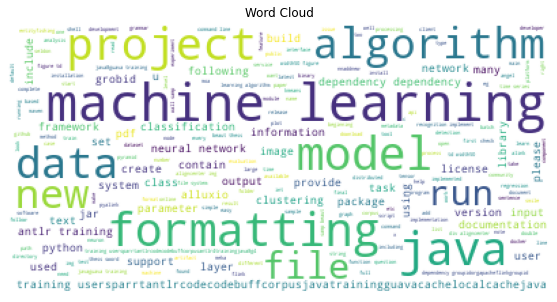

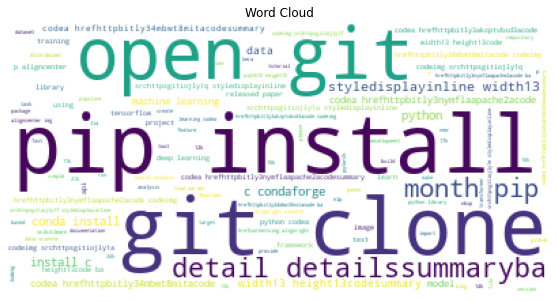

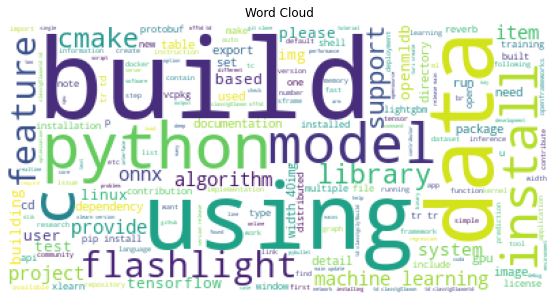

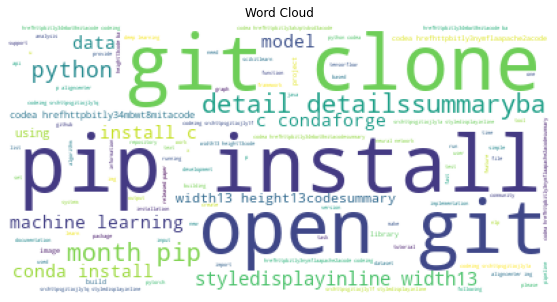

In [101]:
for i in imgs:
    plt.figure(figsize=(10,5))
    plt.title('Word Cloud')
    plt.imshow(i)
    plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

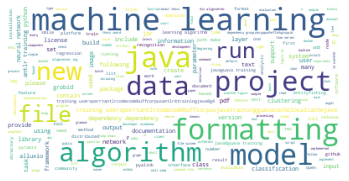

In [85]:
plt.imshow(j_img)
plt.axis('off')

In [79]:
java_words

0              meka
1              meka
2           project
3          provides
4              open
            ...    
11827      language
11828     governing
11829    permission
11830    limitation
11831       license
Length: 11832, dtype: object

In [102]:
def word_cloud(train, language):
    '''
    
    '''
    # Getting our specified language words
    words = (' '.join(train.lemmatized[train.language == language]))
    # Making our WordCloud image object
    img = WordCloud(background_color='white').generate(words)
    # Displaying the WordCloud image
    plt.figure(figsize=(10,5))
    plt.title(f'Word Cloud for {language}')
    plt.imshow(img)
    plt.axis('off')

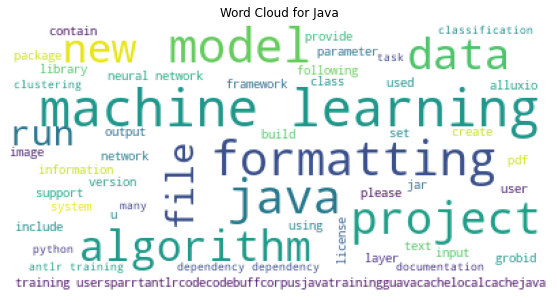

In [103]:
word_cloud(train, 'Java')

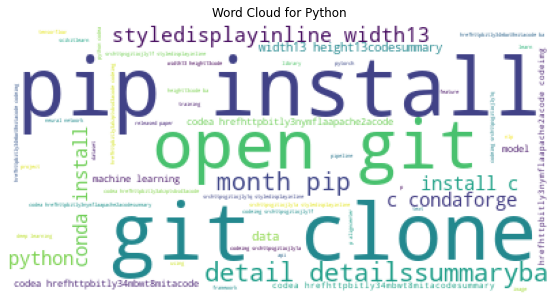

In [104]:
word_cloud(train, 'Python')

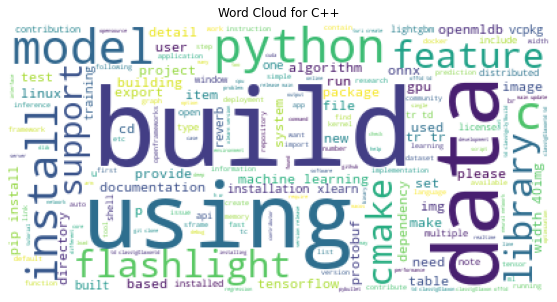

In [105]:
word_cloud(train, 'C++')